# Demo on how to extract a GTIN from a GS1 Digital Link URI

## Purpose of this notebook
Unlike other GS1 data carriers, e.g. the EAN/UPC barcode which is exclusively used to encode a GTIN...  

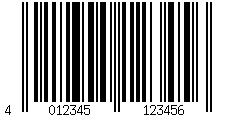

...or the FNC1 character in e.g. a GS1 DataMatrix) ... 

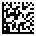
{FNC1} (01) 04012345123456

...a QR Code encoding a GS1 Digital Link (DL) URI does not have an exclusive mechanism to indicate GS1 data: 



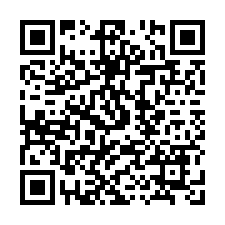

Encoded GS1 Digital Link URI: https://id.gs1.de/01/04012345999969

Rather, it must be recognised through a Regular Expression (RegEx). Taking the example of the GTIN (though the same principle is also applicable for all other GS1 keys and data attributes), this notebook demonstrates how this works.

In [1]:
import re
import json

## Regular Expression for GS1 Digital Link URIs
The following pattern is based on the RegEx as specified in the GS1 Digital Link Standard r. 1.2, section 6.1.1, with two differences: 

(a) it does not support GS1 Keys irrelevant for this demo (e.g. GLN, SSCC), and 

(b) works with raw string notation (i.e. without the '\' escape character) for better readability and comprehensibility.

Note that convenience alphas (e.g.'gtin' instead of '01') are deprecated, thus do not appear in the pattern. 


In [2]:
regex = '^https?:(//((([^\/?#]*)@)?([^\/?#:]*)(:([^\/?#]*))?))?([^?#]*)(((/01/)(\d{4}[^\/]+)(/[^/]+/[^/]+)?[/]?(\?([^?\n]*))?(#([^\n]*))?))'


## Check validity of GS1 Digital Link URI encoding a GTIN and fetch its value

The following function ('checkDLURIs') expects a list of Digital Link URIs ('dlURIList') and returns a dictionary with the encoded string and, if valid, the embedded GTIN value for each list element. If it is not a valid GS1 Digital Link or does not encode a proper GTIN (i.e. a string with is 8, 12, 13 or 14 digits in length), it returns 'INVALID'. 

In [3]:
def checkDLURIs(dlURIList):
    validatedDict = {}
    entries = range(len(dlURIList))
    for j in entries:
        mO = re.match(regex, dlURIList[j])
        if (mO and re.match(r'^((\d{8})|(\d{12})|(\d{13})|(\d{14}))$', mO.group(12))):
            validatedDict[dlURIList[j]] = mO.group(12)
        else:
            validatedDict[dlURIList[j]] = 'INVALID'
    return (json.dumps(validatedDict, indent = 2))


## Valid examples

The following list contains valid examples of GS1 Digital Link URIs embedding a GTIN. The list is then passed a function iterating through it and returning whether an entry is a valid GS1 Digital Link URI which embeds a GTIN. If this is the case, it extracts and also returns the value of the GTIN.


In [4]:
validDLURIs = [
    'https://id.gs1.org/01/04012345123456',
    'https://id.gs1.org/01/9506000149301',
    'https://id.gs1.org/01/9506000149301/',
    'https://example.com/01/04150567890128/21/987654',
    'https://id.gs1.org/01/09506000149301/10/AB-27?17=271231',
    'https://www.example.co.uk/01/04012345123456',
    'http://who-cares-about-ssl.info/01/04012345123456',
    'https://id.smallpackage.de/01/42011231',
    'https://id.north-america-org.com/01/061414155557',
    'https://a.b.c.d.e.f.g.h.we.love.many.sub-domains.com/01/04150567890128',
    'https://id.gs1.de/01/04012345999969/10/Lot-A',
    'https://id.gs1.de/01/04012345999969/21/Ser987'
]

print (checkDLURIs(validDLURIs))

{
  "https://id.gs1.org/01/04012345123456": "04012345123456",
  "https://id.gs1.org/01/9506000149301": "9506000149301",
  "https://id.gs1.org/01/9506000149301/": "9506000149301",
  "https://example.com/01/04150567890128/21/987654": "04150567890128",
  "https://id.gs1.org/01/09506000149301/10/AB-27?17=271231": "09506000149301",
  "https://www.example.co.uk/01/04012345123456": "04012345123456",
  "http://who-cares-about-ssl.info/01/04012345123456": "04012345123456",
  "https://id.smallpackage.de/01/42011231": "42011231",
  "https://id.north-america-org.com/01/061414155557": "061414155557",
  "https://a.b.c.d.e.f.g.h.we.love.many.sub-domains.com/01/04150567890128": "04150567890128",
  "https://id.gs1.de/01/04012345999969/10/Lot-A": "04012345999969",
  "https://id.gs1.de/01/04012345999969/21/Ser987": "04012345999969"
}


## Invalid Examples

The following list contains invalid examples of GS1 Digital Link URIs embedding a GTIN. Consequently, when checking it against the RegEx, they are not recognised as a Web URI properly encoding a GTIN.

In [5]:
invalidGS1DLURIs = [
    'GS1 2D Community',
    'id.gs1.org/01/04012345123456',
    'www.gs2.org/01/04012345123456',
    'ftp://example.com/01/04012345123456',
    'https://www.nutello.de/schokobecher',
    'https://id.gs1.org/gtin/04012345123456',
    'https://id.gs1.org/00/04012345123456',
    'https://id.gs1.org/01/123',
    'https://id.gs1.org/01/1234567891011223456565',
    '04012345999969',
    'EAN:4012345999969',
    'GTIN=04012345999969'
]

print (checkDLURIs(invalidGS1DLURIs))


{
  "GS1 2D Community": "INVALID",
  "id.gs1.org/01/04012345123456": "INVALID",
  "www.gs2.org/01/04012345123456": "INVALID",
  "ftp://example.com/01/04012345123456": "INVALID",
  "https://www.nutello.de/schokobecher": "INVALID",
  "https://id.gs1.org/gtin/04012345123456": "INVALID",
  "https://id.gs1.org/00/04012345123456": "INVALID",
  "https://id.gs1.org/01/123": "INVALID",
  "https://id.gs1.org/01/1234567891011223456565": "INVALID",
  "04012345999969": "INVALID",
  "EAN:4012345999969": "INVALID",
  "GTIN=04012345999969": "INVALID"
}


## Closing Remarks

For illustration purposes, this notebook focussed on how to recognise a valid GS1 Digital Link URI embedding a GTIN in a 2D code and how it is possible to extract the GTIN value e.g. for retail checkout.

If a GS1 Digital Link URI encodes further data elements (e.g. a batch/lot number or best-by-date), extracting the data works in a similar fashion. In this case, the respective GS1 element strings are parsed and provided the respective IT applications. 

Taking the example of a GS1 Digital Link URI such as 'https://id.gs1.de/01/04012345999969/10/Lot-A/21/Ser987', an IT application would receive the following parsed string: '(01)04012345999969(10)Lot-A(21)Ser987', i.e. like it was the case with previous GS1 Type A data carriers. 

In other words: if backend applications already understand GS1 Application Identifiers, there is no need for modification/reconfiguration on this end. So, the only thing scanning systems must be capable of is to recognise a valid GS1 Digital Link URI embedding GS1 data structures and provide the parsed data in the usual way. 

Hope this helps - thanks for reading!